In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 6.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
from random import randrange
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("IBOVESPA.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
kernel_size=[2,3,4,6]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameter Search

In [ ]:
from random import randrange
from numpy.random import seed

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
124/124 [==============================] - 18s 10ms/step - loss: 0.0138 - accuracy: 2.5361e-04 - mean_absolute_error: 0.0981
Epoch 2/3
124/124 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 2.5361e-04 - mean_absolute_error: 0.0468
Epoch 3/3
18/18 [==============================] - 0s 4ms/step
Epoch: 3 | Inputs: 84 | Kernel: 4 | Dropout: 0 | Loss: huber_loss
RMSE: 0.005825670087761391 | Accuracy: 59.72792332339794
Epoch 1/15
122/122 [==============================] - 8s 12ms/step - loss: 0.2604 - accuracy: 5.1269e-04 - mean_absolute_error: 0.2604
Epoch 2/15
122/122 [==============================] - 1s 9ms/step - loss: 0.0453 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0453
Epoch 3/15
122/122 [==============================] - 1s 9ms/step - loss: 0.0379 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0379
Epoch 4/15
122/122 [==============================] - 1s 11ms/step - loss: 0.0369 - accuracy: 2.5634e-04 - mean_absolute_error: 0.0369
Epoch 5/

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
126/126 [==============================] - 4s 8ms/step - loss: 0.0381 - accuracy: 2.4963e-04 - mean_absolute_error: 0.1431
Epoch 2/5
126/126 [==============================] - 1s 7ms/step - loss: 0.0042 - accuracy: 4.9925e-04 - mean_absolute_error: 0.0613
Epoch 3/5
126/126 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 4.9925e-04 - mean_absolute_error: 0.0493
Epoch 4/5
126/126 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0440
Epoch 5/5
18/18 [==============================] - 0s 3ms/step
Epoch: 5 | Inputs: 21 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.003663210504181997 | Accuracy: 71.67742100862003
Epoch 1/10
124/124 [==============================] - 6s 10ms/step - loss: 0.1866 - accuracy: 2.5361e-04 - mean_absolute_error: 0.1866
Epoch 2/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0430 - accuracy: 2.5361e-04 - mean_absolute_error: 0.0430
Epoch 3/10


In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/7
124/124 [==============================] - 5s 9ms/step - loss: 0.0607 - accuracy: 5.0454e-04 - mean_absolute_error: 0.1446
Epoch 2/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0058 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0525
Epoch 3/7
124/124 [==============================] - 1s 10ms/step - loss: 0.0061 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0527
Epoch 4/7
124/124 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 5.0454e-04 - mean_absolute_error: 0.0553
Epoch 5/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0047 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0470
Epoch 6/7
124/124 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 2.5227e-04 - mean_absolute_error: 0.0352
Epoch 7/7
18/18 [==============================] - 0s 3ms/step
Epoch: 7 | Inputs: 63 | Kernel: 2 | Dropout: 0 | Loss: mse
RMSE: 0.005200693658989569 | Accuracy: 46.96831226829171
Epoch 1/15
124/124 [==

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(4)
  l=randrange(3)
  m=randrange(6)
  n=randrange(3)
  o=randrange(2)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=kernel_size[k], dilations=dilations[i], nb_stacks=1,padding='causal',
                dropout_rate=dropouts[l],activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[n], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[m])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[m]} | Inputs: {n_inputs[i]} | Kernel: {kernel_size[k]} | Dropout: {dropouts[l]} | Loss: {losses[n]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
120/120 [==============================] - 8s 14ms/step - loss: 0.0762 - accuracy: 2.6055e-04 - mean_absolute_error: 0.2272
Epoch 2/15
120/120 [==============================] - 1s 9ms/step - loss: 0.0082 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0852
Epoch 3/15
120/120 [==============================] - 1s 9ms/step - loss: 0.0050 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0671
Epoch 4/15
120/120 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0598
Epoch 5/15
120/120 [==============================] - 1s 9ms/step - loss: 0.0031 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0506
Epoch 6/15
120/120 [==============================] - 1s 9ms/step - loss: 0.0023 - accuracy: 5.2110e-04 - mean_absolute_error: 0.0453
Epoch 7/15
120/120 [==============================] - 1s 11ms/step - loss: 0.0022 - accuracy: 2.6055e-04 - mean_absolute_error: 0.0434
Epoch 8/15
120/120 [==============================] - 2s 13m

Epoch: 5 | Inputs: 21 | Kernel: 4 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.003663210504181997 | Accuracy: 71.67742100862003

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
126/126 [==============================] - 4s 7ms/step - loss: 0.0129 - accuracy: 2.4963e-04 - mean_absolute_error: 0.1007
Epoch 2/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0440
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0394
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0365
Epoch 5/7
126/126 [==============================] - 1s 9ms/step - loss: 0.0016 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0358
Epoch 6/7
126/126 [==============================] - 1s 9ms/step - loss: 0.0015 - accuracy: 2.4963e-04 - mean_absolute_error: 0.0356
Epoch 7/7
54/54 [==============================] - 0s 4ms/step
Epoch 1/7
126/126 [==============================] - 4s 7ms/step - loss: 0.0520 - accuracy: 2.4963e-04 - mean_absolute_error: 0.1832
Epoch 

In [ ]:
Accuracy

[66.65068822682856,
 65.39941977909005,
 62.692571561550956,
 54.084153586943295,
 70.77832015677639,
 53.81263555522451,
 65.72472371519603,
 62.754255028724145,
 63.72323981590501,
 66.48143846112285,
 58.19699656127113,
 69.60246596567924,
 68.27105104949516,
 66.77041959482646,
 67.44701816949149]

In [ ]:
RMSE

[0.0034126162652643004,
 0.0035011871272416116,
 0.003565787980332162,
 0.004125570015177638,
 0.0033670387988715598,
 0.004228383842815042,
 0.003471901586819222,
 0.0035911393407406004,
 0.0035843248929693498,
 0.0034188675092801887,
 0.003850849035176226,
 0.0033679606217459097,
 0.003468887354782155,
 0.0034178409094543644,
 0.0034510536841626]

In [ ]:
Quasilikelihood

[0.0798063724528742,
 0.08478916102843535,
 0.09226236565926696,
 0.12288101702839552,
 0.06959807935076598,
 0.12641965050137954,
 0.08345806633082165,
 0.09209959832343176,
 0.09007423527432164,
 0.08044388154556456,
 0.10758634935305843,
 0.07462307998588595,
 0.07546918156536991,
 0.0801726460925556,
 0.07810873585003604]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

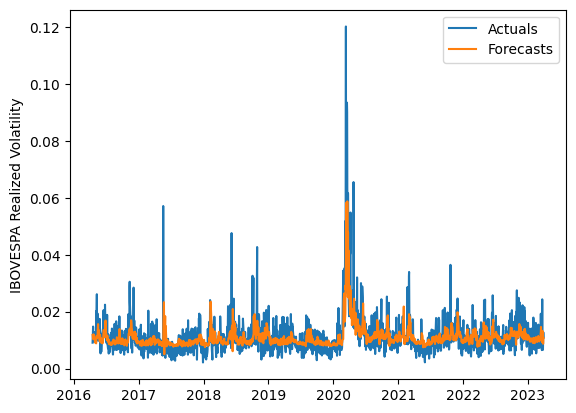

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
len(test)%3

1

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%3]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0090 - accuracy: 0.3175 - mean_absolute_error: 0.0797
Epoch 2/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0020 - accuracy: 0.3500 - mean_absolute_error: 0.0412
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 0.3495 - mean_absolute_error: 0.0380
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.3360 - mean_absolute_error: 0.0359
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.3689 - mean_absolute_error: 0.0350
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.3323 - mean_absolute_error: 0.0348
Epoch 7/7
18/18 [==============================] - 0s 8ms/step
Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0154 - accuracy: 0.3684 - mean_absolute_error: 0.0974
Epoch 2/7
126/126 [===============

In [ ]:
RMSE

[0.0037661905214254887,
 0.003470287053212142,
 0.003509355778483531,
 0.0036671059234706983,
 0.0035715142047099786,
 0.0037600077052748863,
 0.0037207655551287195,
 0.003535217806486825,
 0.0036647667642839676,
 0.0036154250718454335,
 0.003910156879602417,
 0.0035766209429102637,
 0.004068855562857734,
 0.0036670365772484828,
 0.003551105787295437]

In [ ]:
Accuracy

[60.27983112922119,
 66.86451815616698,
 67.94371846925031,
 61.796229893449095,
 64.59661016267061,
 60.05753974104478,
 61.055092608192865,
 64.17861663423146,
 62.00864005466627,
 62.293410913659564,
 57.83444230702823,
 63.3227055283889,
 55.494914381177175,
 62.153590762573415,
 64.99030931355931]

In [ ]:
Quasilikelihood

[0.10240805261527511,
 0.08063018579968868,
 0.07882759912559968,
 0.09751707119491095,
 0.08669164085112072,
 0.1028581639746694,
 0.09913809531388415,
 0.08893702980599116,
 0.09564137363031373,
 0.09594583326376416,
 0.1123292857261997,
 0.09247417211476329,
 0.11915606884296026,
 0.09548167809634149,
 0.0863413849638051]

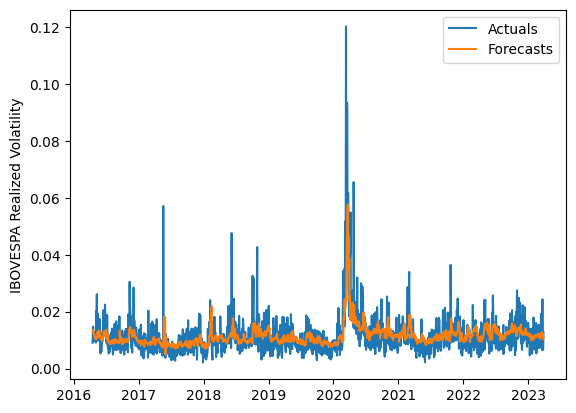

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
126/126 [==============================] - 5s 9ms/step - loss: 0.0316 - accuracy: 0.1987 - mean_absolute_error: 0.1310
Epoch 2/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.2768 - mean_absolute_error: 0.0550
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.1892 - mean_absolute_error: 0.0438
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.1540 - mean_absolute_error: 0.0398
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.1243 - mean_absolute_error: 0.0369
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.0881 - mean_absolute_error: 0.0362
Epoch 7/7
11/11 [==============================] - 0s 10ms/step
Epoch 1/7
126/126 [==============================] - 4s 8ms/step - loss: 0.0148 - accuracy: 0.2177 - mean_absolute_error: 0.0963
Epoch 2/7
126/126 [==============

In [ ]:
RMSE

[0.003649649937622921,
 0.003730138081192565,
 0.00393732353470421,
 0.0037176020905480985,
 0.004547653387768082,
 0.004140751149885433,
 0.0037921602578728972,
 0.0037862473901008244,
 0.0037998001565768946,
 0.0035781429323081242,
 0.003664401228217863,
 0.0037684938974604405,
 0.00474641798341984,
 0.003883441431828624,
 0.003762058281428737]

In [ ]:
Accuracy

[63.772592655939405,
 61.66670339611826,
 58.269637354442814,
 62.48484283383959,
 48.90790965129447,
 54.88627089932581,
 60.724729586223766,
 60.127545057002166,
 59.81180801094551,
 64.02454131825313,
 63.326530183205,
 60.19291363719339,
 46.174886549357,
 59.1336567788677,
 60.61988774445874]

In [ ]:
Quasilikelihood

[0.09188833594587947,
 0.09868411616647896,
 0.1122442086053292,
 0.09563988351309292,
 0.1481004117441965,
 0.12629841819912666,
 0.10283884299374,
 0.10588127231916317,
 0.1047194183480215,
 0.08958674722014405,
 0.0936175113760407,
 0.10327684714653879,
 0.15756424378386988,
 0.10830036068867098,
 0.10294403477239243]

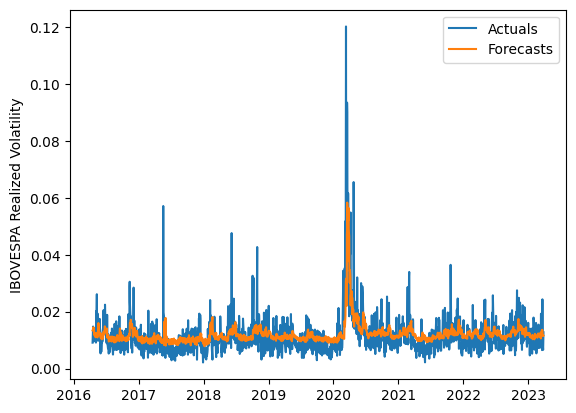

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%10]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0170 - accuracy: 0.0589 - mean_absolute_error: 0.0957
Epoch 2/7
126/126 [==============================] - 1s 6ms/step - loss: 0.0024 - accuracy: 0.0617 - mean_absolute_error: 0.0452
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.0864 - mean_absolute_error: 0.0402
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0629 - mean_absolute_error: 0.0380
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0696 - mean_absolute_error: 0.0368
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.0587 - mean_absolute_error: 0.0360
Epoch 7/7
6/6 [==============================] - 0s 19ms/step
Epoch 1/7
126/126 [==============================] - 5s 9ms/step - loss: 0.0075 - accuracy: 0.0896 - mean_absolute_error: 0.0730
Epoch 2/7
126/126 [================

In [ ]:
RMSE

[0.003817470274095669,
 0.003941948486845003,
 0.0039848043106399,
 0.004016863888736078,
 0.003929426745724146,
 0.005127184045021847,
 0.0042310824391401745,
 0.003808199818584196,
 0.0038947947595739164,
 0.005093948058895161,
 0.004000196942035895,
 0.004008178347282632,
 0.003982175289427813,
 0.0038726684466779088,
 0.003864765137967117]

In [ ]:
Accuracy

[61.63435270846447,
 57.75307221717823,
 57.38197385422335,
 57.05147902928138,
 58.01141831709593,
 41.85835305086385,
 52.94218445816684,
 60.93271617207967,
 58.596542879164225,
 42.41391213860706,
 57.450289166252745,
 56.682039743128755,
 57.46228634907271,
 58.76958664026325,
 58.98960439655938]

In [ ]:
Quasilikelihood

[0.10110282349558941,
 0.11492936307157257,
 0.1167112053936311,
 0.11601536701054677,
 0.1134373007859323,
 0.17626680020545893,
 0.13258196236206188,
 0.10349880293621723,
 0.11016322916231665,
 0.17438484026869447,
 0.11448437873488457,
 0.1178927660439127,
 0.11537358444271985,
 0.11096228179909841,
 0.11018479868346717]

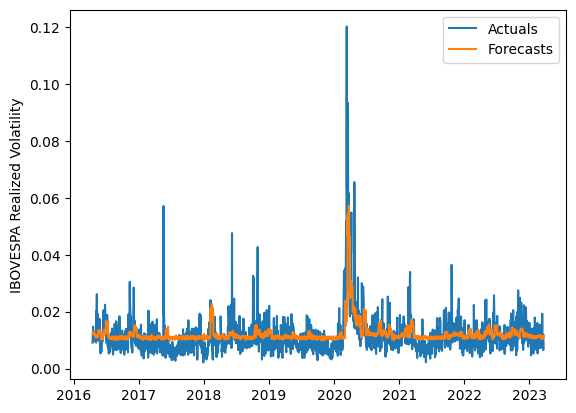

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 21
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=4, dilations=[1,2,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='huber_loss', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=7)
  test=test[:len(test)-len(test)%22]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0113 - accuracy: 0.0280 - mean_absolute_error: 0.0833
Epoch 2/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 0.0220 - mean_absolute_error: 0.0431
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.0339 - mean_absolute_error: 0.0393
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0215 - mean_absolute_error: 0.0378
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0202 - mean_absolute_error: 0.0371
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.0160 - mean_absolute_error: 0.0352
Epoch 7/7
3/3 [==============================] - 0s 43ms/step
Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0072 - accuracy: 0.0250 - mean_absolute_error: 0.0717
Epoch 2/7
126/126 [================

3/3 [==============================] - 0s 4ms/step
Epoch 1/7
126/126 [==============================] - 4s 8ms/step - loss: 0.0048 - accuracy: 0.0205 - mean_absolute_error: 0.0622
Epoch 2/7
126/126 [==============================] - 1s 9ms/step - loss: 0.0019 - accuracy: 0.0472 - mean_absolute_error: 0.0392
Epoch 3/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.0607 - mean_absolute_error: 0.0365
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 0.0994 - mean_absolute_error: 0.0360
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.0404 - mean_absolute_error: 0.0349
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.0864 - mean_absolute_error: 0.0350
Epoch 7/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.1782 - mean_absolute_error: 0.0344


3/3 [==============================] - 0s 4ms/step
Epoch 1/7
126/126 [==============================] - 5s 7ms/step - loss: 0.0202 - accuracy: 0.0537 - mean_absolute_error: 0.1010
Epoch 2/7
126/126 [==============================] - 1s 9ms/step - loss: 0.0025 - accuracy: 0.0072 - mean_absolute_error: 0.0458
Epoch 3/7
126/126 [==============================] - 1s 9ms/step - loss: 0.0021 - accuracy: 0.0105 - mean_absolute_error: 0.0413
Epoch 4/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 0.0185 - mean_absolute_error: 0.0385
Epoch 5/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0117 - mean_absolute_error: 0.0376
Epoch 6/7
126/126 [==============================] - 1s 7ms/step - loss: 0.0017 - accuracy: 0.0225 - mean_absolute_error: 0.0368
Epoch 7/7
3/3 [==============================] - 0s 4ms/step
Epoch 1/7
126/126 [==============================] - 4s 7ms/step - loss: 0.0144 - accuracy: 0.0417 - mean_absolute

In [ ]:
RMSE

[0.004166206813986793,
 0.004222295217623779,
 0.0044600853424952396,
 0.004264797195009482,
 0.004327914709461452,
 0.004221647894405401,
 0.004144231026204249,
 0.004287515540883147,
 0.0045159472546648805,
 0.004402072212118866,
 0.0043418761491866515,
 0.004153555695844105,
 0.004110037999917259,
 0.004141249223595325,
 0.00413426054193065]

In [ ]:
Accuracy

[55.68742785520702,
 56.53224903724118,
 50.23175415621475,
 54.108661667543686,
 52.979590497270856,
 54.47710215386849,
 56.51061613192281,
 53.33772101541532,
 51.076231596307096,
 51.83390757618662,
 52.49920819808468,
 56.53217254049034,
 56.28556406508516,
 58.06606789995137,
 56.13963165020341]

In [ ]:
Quasilikelihood

[0.12289798584271869,
 0.12104875180634153,
 0.14352111835112882,
 0.12891368997894045,
 0.13360075453437323,
 0.12794135739713194,
 0.11962905739653067,
 0.13255866515382683,
 0.1412781972657851,
 0.13771489646716237,
 0.1350099228557833,
 0.11917958587153094,
 0.12169873940828495,
 0.11585432246858568,
 0.12060584801663934]

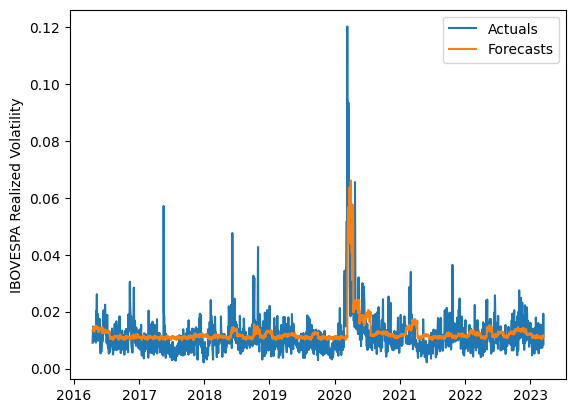

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("IBOVESPA Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])